In [ ]:
#| title: "Blog Post 6"
#| author: "Niyati Sharma"
#| Description : Final project "Analyzing Customer Reviews of Uber"

# **Introduction**

Nowadays, most organizations and businesses develop online services, which add value to their business and even increase their customer base. Surveys and reviews have changed the dynamics of digital marketing. The feedback platform gave the power to customers to post, share, and review content. Customers can directly interact with other customers and companies.There are many companies that use public opinion to be able to achieve the goals of the company. 

Along with the increasing number of internet, social media users and mobile devices will certainly impact on the increasing amount of data or user-generated content. The simple forms to collect opinions are application review and rating people give for their experience. With a massive information flows from social media, a highly effective approach is needed to summarize and retrieve information in a real-time situation. These feedbacks contains a lot of information which needs to be classified under different brackets like postive or negative. In this research, we have used customer feedbacks to analyse the issues faced by them during Uber rides. 

We use topic modeling to determine topics that contained
in the data. Numerous way of topic distribution is applicable such as Clustering, Feature Generation, and Dimensionality Reduction. Dimensionality reduction has an advantage compared to the other because each document’s distribution over topics gives a summary of the document. Compare them in this reduce feature space can be more meaningful than comparing in the original feature space. In this project, we are using BERTopic, which leverages this property. 

Uber is one of the largest and greatest innovation in transport with its fast development, the interaction among user in the platform is high.In this research, we aim to dig further information from the dataset. We see the topics from the public opinion perspective in application reviews and ratings, especially their opinion regarding Uber, the sentiment is surely changing every day then which topic has positive or negative sentiment. This is useful for data processing to be more effective and fast. 

### What are research questions?

In this research, we will analyze huge user-generated content which can be used by organizations for their customer engagement strategies.The purpose of this study is to to map the public opinion towards certain topic by analyzing the sentiment of the text and create a topic model. The reviews feedback provide a lot of information about the product experience, any technical or operational gaps, and even their general sentiment towards the product company. The analysis will help in identifying the gaps in the priorities of the stakeholders. With the right customer engagement strategies, companies can make benefit.
 
We pick Uber as the case study, viewed as one of the most favored transportation methods in most part of the world to do the following search question. 

1. Problems faced by customers.



## How are the data collected?

Collected the data from play store reviews. I scrapped the latest 50,000 reviews from there irrespective of the rating. https://play.google.com/store/apps/details?id=com.ubercab
There are 10 columns in the data file among those we are using content column for reviews and score for rating. 
1. reviewId 
2. userName  
3. User image 
4. Content
5. score
6. thumbsUpCount
7. reviewCreatedVersion
8. at (review created date and time)
9. replyContent
10.replyAt

In [68]:
#installing the required packages
!pip install bertopic
!pip install google-play-scraper 
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
#importing the required packages
from google_play_scraper import Sort, reviews
import pandas as pd
from bertopic import BERTopic
from google.colab import files

In [70]:
#strings
#go to google play store: https://play.google.com/store/apps
#go to playstore app page
#copy the app id id={appid}

appURL = 'com.ubercab'

In [71]:
#scraping reviews from google play store
result, continuation_token = reviews(
    appURL, #app url
    lang='en', #language
    country='us', #country
    sort=Sort.NEWEST,
    count = 50000,
  
)

result, _ = reviews(
    appURL,
    continuation_token=continuation_token
)

In [72]:
import pandas as pd

In [73]:
#putting everything into a dataframe
df = pd.DataFrame(result)


In [74]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,da54d81e-d706-4ae5-99e3-76ba49b039a5,kirity kalwal,https://play-lh.googleusercontent.com/a-/AD5-W...,worst experience,1,1,4.439.10002,2022-10-04 03:58:47,None,NaT
1,3d13bfe0-74e8-4f33-b77d-fdf790998384,Willy Bobo,https://play-lh.googleusercontent.com/a-/AD5-W...,Very good 😊,4,0,4.439.10002,2022-10-04 03:54:47,None,NaT
2,e11df7cb-9226-4897-988d-bd09084bef3d,Bianca Andreea,https://play-lh.googleusercontent.com/a-/AD5-W...,Great,5,0,4.439.10002,2022-10-04 03:49:34,None,NaT
3,4b1a4b8d-b151-4b29-9f4a-fe8cc445122a,Gene Hennen,https://play-lh.googleusercontent.com/a/AEdFTp...,"Great conversation, great service",5,0,4.439.10002,2022-10-04 03:48:58,None,NaT
4,67bbc446-418a-48b4-921b-c93344cf63dc,geeta tyagi,https://play-lh.googleusercontent.com/a/AEdFTp...,In service industry you have to maintain quali...,4,0,4.439.10002,2022-10-04 03:45:22,None,NaT


**Data Cleaning**

In [75]:
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("en")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading en: Package 'en' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


**Data Cleaning** :

In [76]:
def tokenize( data ):
    data1 = data.map(lambda x: word_tokenize(x))
    return data1

def removeStopwords( data ):
    stop_words = set(stopwords.words('english'))
    data1 = data.map(lambda x: [ w for w in x if w.lower() not in stop_words ])
    return data1

def lemmatize( data ):
    lemmatizer = WordNetLemmatizer()
    lemma_words = [ lemmatizer.lemmatize(w, pos='a') for w in data ]
    return lemma_words

def removeFalseSentiments( content, score ):
    final = content
    if score<=2:
        pos_words = ['good', 'excellent', 'great', 'nice']
        content = content.lower()
        for word in pos_words:
          if word in content:
              final = ''
              break  

    return final

def cleaning_data(data):
    data = data.map(lambda x: re.sub(r'\d+', ' ', str(x))) # Remove numbers
    data = data.map(lambda x: x.translate(x.maketrans('', '', string.punctuation))) # Remove Punctuation
    data = data.map(lambda x: x.strip()) # Remove white spaces
    data = tokenize( data )
    data = removeStopwords( data )
    data = data.map(lambda x: [w for w in x if w.isalpha()]) # Remove non alphabetic tokens
    data = data.map(lambda x: [w for w in x if len(w)>3 ]) #Removing small strings
    data = data.map(lambda x: ' '.join(x)) # turning back to string
    words = set(nltk.corpus.words.words())
    data = data.map(lambda x: [ w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ]) # Remove non english words
    data = data.map(lambda x: ' '.join(x)) # turning back to string
    return data

df['content'] = lemmatize ( cleaning_data(df['content']) )
print(df.shape)
df['content'] = df.apply(lambda row: removeFalseSentiments(row['content'], row['score']), axis = 1)
df = df.loc[df['content']!=''] #remove rows with empty content value
print(df.shape)

(50000, 10)
(46063, 10)


**Exploratory Analysis**

To verify whether the preprocessing, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

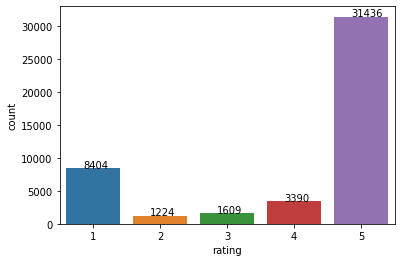

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
ax = sns.countplot(df['score'])
for p in ax.patches:
  ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))
plt.xlabel('rating')
plt.show()


In [78]:
def scoreToSentiment(df):
    data = df['score']
    if data<=2:
        return "negative"
    elif data==3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df.apply(lambda x : scoreToSentiment(x), axis = 1)

**Word Cloud**

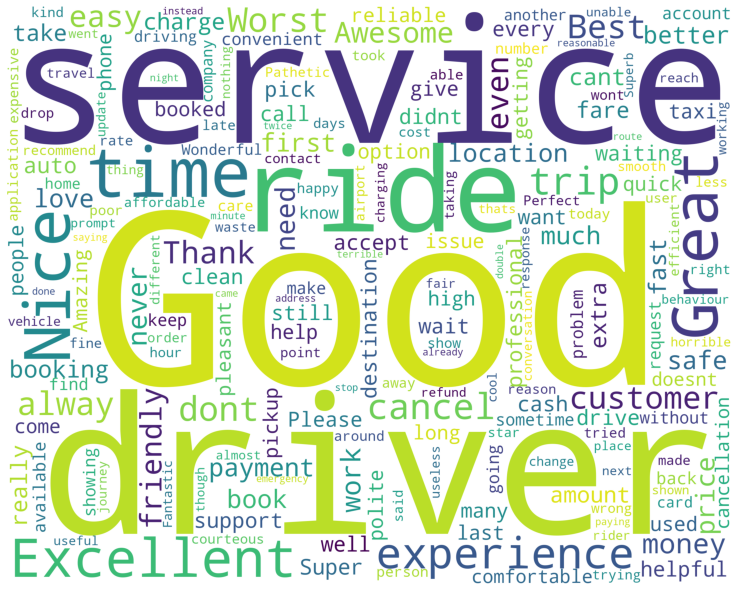

None


In [79]:
def wordcloudPlot(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000,collocations=False
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print(wordcloudPlot(df['content']))

In [80]:
dfPostive = df.loc[df['sentiment']=='positive']
dfNeutral = df.loc[df['sentiment']=='neutral']
dfNegative = df.loc[df['sentiment']=='negative']

## Positive Word Cloud

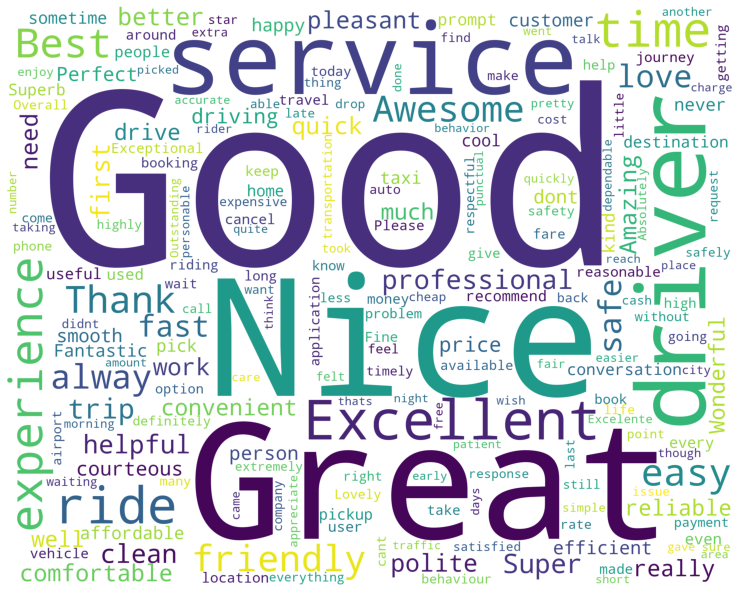

None


In [93]:
print(wordcloudPlot(dfPostive['content']))

## Neutral Word Cloud 

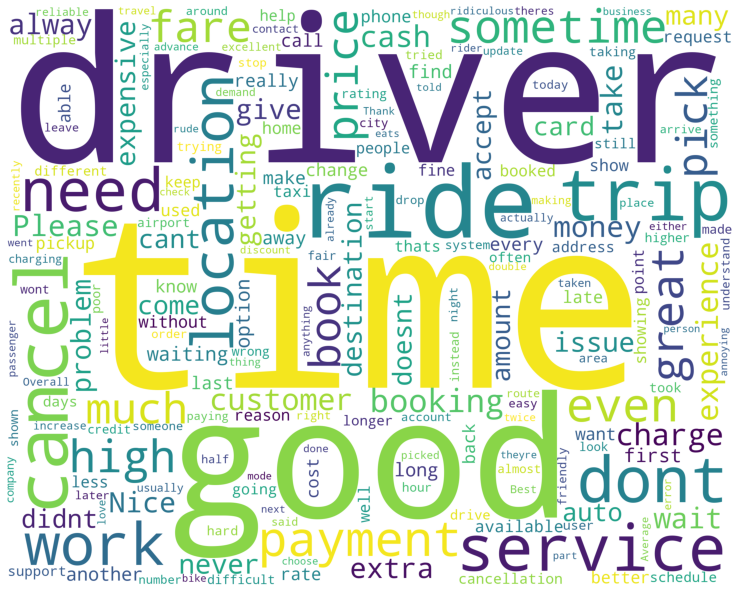

None


In [94]:
print(wordcloudPlot(dfNeutral['content']))

## Negative Word Cloud

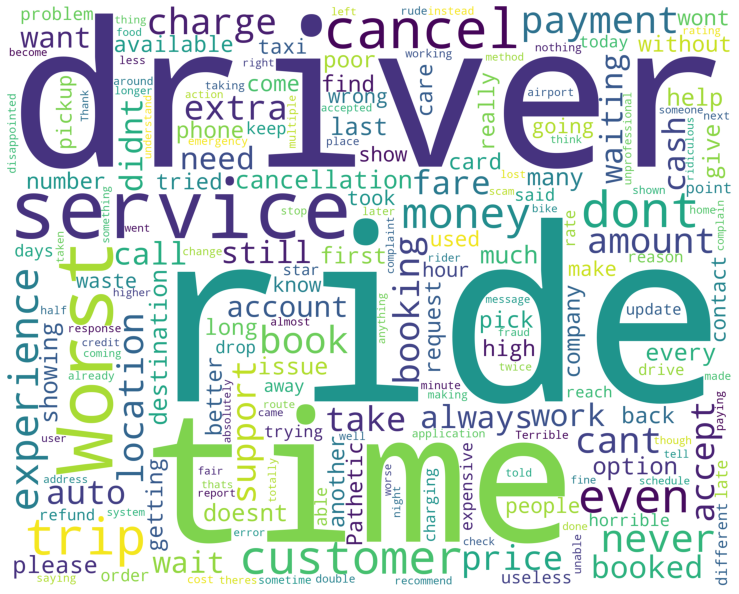

None


In [95]:
print(wordcloudPlot(dfNegative['content']))

# Topic Modeling :

Topic modeling is a method for unsupervised classification of documents, similar to clustering on numeric data which finds natural groups of items even when we’re not sure what we’re looking for.
Here we are using ‘Topic Modeling’ to extract hidden topics from large volumes of reviews to search the pain points of customers. 
We used BERTopic library as our topic modeling technique. We created 28 topics for our dataset only using the ‘Negative’ sentiments data and visualized our topics using ‘Topic word score’ and ‘Documents and Topics’ plot.

Here we are trying to find the common problems of the uber users.

In [96]:
#Converting all the reviews to a list for training

docs = dfNegative['content'].head(5000).tolist()
model = BERTopic(language="english",
                 calculate_probabilities=True, 
                 verbose=True, 
                 n_gram_range=(1, 1), 
                 nr_topics='auto')


topics, probs = model.fit_transform(docs)

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2022-12-20 06:04:00,746 - BERTopic - Transformed documents to Embeddings
2022-12-20 06:04:10,391 - BERTopic - Reduced dimensionality
2022-12-20 06:04:11,680 - BERTopic - Clustered reduced embeddings
2022-12-20 06:04:20,372 - BERTopic - Reduced number of topics from 88 to 68


From above code, now we can retrieve topics that exist on the dataset. For displaying a table that contains the topic along with the number of reviews.

In [97]:
model.get_topic_info()

,Topic,Count,Name
0,-1,2043,-1_ride_driver_time_trip
1,0,300,0_cancel_cancellation_ride_accept
2,1,218,1_payment_cash_card_method
3,2,205,2_customer_support_care_service
4,3,134,3_worst_ever_service_experience
...,...,...,...
63,62,11,62_airport_frequent_stuck_link
64,63,11,63_schedule_work_moderate_advance
65,64,11,64_double_twice_mixed_filling
66,65,10,65_star_stand_giving_much


As you can see from above, there are 68 topics inside the dataset. The -1 topic doesn’t include because those reviews don’t have a significant meaning.


In [98]:
# Get top 10 terms for a topic
model.get_topic(0)

[('cancel', 0.06223298271060784),
 ('cancellation', 0.03825853365757486),
 ('ride', 0.02019142970454021),
 ('accept', 0.01524896143556917),
 ('time', 0.01510312751984696),
 ('wait', 0.014113576134425746),
 ('driver', 0.013177371912182994),
 ('dont', 0.012636741585324148),
 ('many', 0.01224082397906097),
 ('even', 0.01151174965117534)]

**Visualize Topics**

After creating topics from model now we can use call .visualize_topics to create a 2D representation of topics. The resulting graph is a plotly interactive graph which can be converted to HTML.

In [99]:
model.visualize_topics()

Using the slider to select the topic which then lights up red. If we hover over a topic, then general information is given about the topic, including the size of the topic and its corresponding words.

**Visualize Topic Hierarchy**

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we used 'visualize_hierarchy()' to create clusters and visualize how they relate to one another. This might help selecting an appropriate nr_topics when reducing the number of topics that you have created running the following code to visualize this hierarchy:

In [100]:
model.visualize_hierarchy()


**Visualization using barchart**

The second visualization we did is the bar charts of the most occurred words for each topic running the following code :

In [101]:
model.visualize_barchart()

**Visualization using heatmap**

The following code generates the heat map that displays which topic is highly correlated with another topic.


In [102]:
model.visualize_heatmap()

**Visualizating term rank**

As, we could see before that each topic is represented by set of words. However, these words doesn't depcit whole behaviour of the topics generated. Hence, using 'visualize_term_rank' function results the neccessary word needed to demonstrate the true behaviour of topics using a term score. Post that, the term score tends to decline as we don't need additional words. 

In [103]:
model.visualize_term_rank()

**Visualize Documents**

We can visualize the topics and get insight into their relationships. However, we might want a more fine-grained approach where we can visualize the documents inside the topics to see if they were assigned correctly or whether they make sense. To do so, we can use the topic_model.visualize_documents() function. This function recalculates the document embeddings and reduces them to 2-dimensional space for easier visualization purposes.

In [104]:
model.visualize_documents(docs, hide_annotations = True)

**Conclusion**

From the ‘Documents and Topics’ plot, we can see the large cluster of most negative sentiments where issues like trip cancellation,  cash payment, extra ride charge, worst customer service, rude driver etc. generally consitutes  the top 5 topics. Moreover, from the ‘Topic word scores’,  we can see that the score are maximum of most frequent words of Negative word cloud. 

Hence, to answer our research questions about the problems faced by the customers, we can comment based of our topic modeling outputs that the primary problems faced are related to extra or unreasonable fare, driver behavior, trip cancellation, customer service etc as demonstrated in documents visualization. Additionally, if we see our ‘Negative word cloud’ then the most frequent words are driver, cancel, time, ride, service etc. Therefore, the word cloud explains our topic modeling output. 


**Future Work**

1. We could use more advanced data cleaning processing using deep learning tools for better performance and accuracy. 
2. We can extend the project to find postive feedbacks of Uber reviews. 
3. The project can be extended to other feedback or review system like movie reviews, restaurant reviews etc.

**References**
1. https://maartengr.github.io/BERTopic/index.html
2. https://maartengr.github.io/BERTopic/algorithm/algorithm.html
3. https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.fit_transform
4. https://ourcodingclub.github.io/tutorials/topic-modelling-python/
5. https://towardsdatascience.com/implement-your-topic-modeling-using-the-bertopic-library-d6708baa78fe
6. Ombabi, A.H.; Ouarda, W.; Alimi, A.M. Deep learning CNN–LSTM framework for Arabic sentiment analysis using textual information shared in social networks. Soc. Netw. Anal. Min. 2020, 10, 53.
7. Mathews, D.M.; Abraham, S. Social data sentiment analysis of a multilingual dataset: A case study with malayalam and english. In Proceedings of the International Conference on Advanced Informatics for Computing Research, Shimla, India, 15–16 June 2019; pp. 70–78.
